In [127]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from dataclasses import dataclass, field

### Simulating Brownian motion 

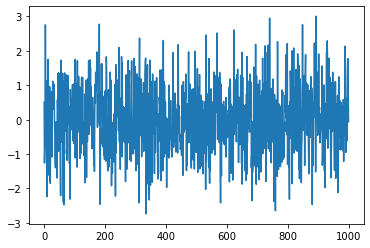

In [2]:
N = 1000
displacement = np.random.randn(N)
plt.plot(displacement)
plt.show()

### Distribution of displacements

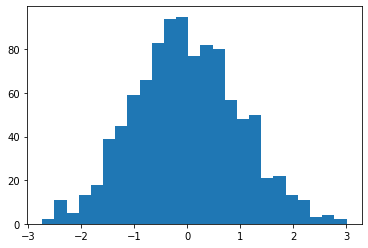

In [5]:
plt.hist(displacement, bins=25)
plt.show()

### Convert displacements to position

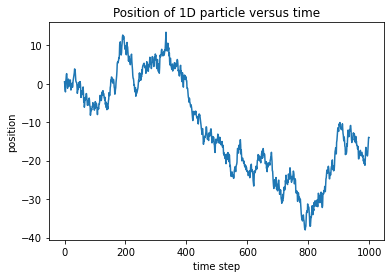

In [6]:
x = np.cumsum(displacement)
plt.plot(x)
plt.ylabel("position")
plt.xlabel("time step")
plt.title("Position of 1D particle versus time")
plt.show()

### Two dimensional particle simulations

In [123]:
class Particle:
    def __init__(self, time_steps: int = 1000, tau: float = 0.1, particle_size: float = 1e-6, T: float = 293):
        self.time_steps = time_steps
        self.particle_size = particle_size # in micrometers
        self.tau = tau # time interval in seconds
        self.T = T # temperature in Kelvin
        self.D = self._diffusion_contant()

        # Calculate particle motion
        self.dx = self._steps()
        self.dy = self._steps()
        self.x = np.cumsum(self.dx)
        self.y = np.cumsum(self.dy)
        
        
    def _steps(self):
        k = np.sqrt(2 * self.D * self.tau)
        return k * np.random.randn(self.time_steps)

    def _diffusion_contant(self):
        eta = 1e-3 # viscosity of water in SI unit (Pascal-seconds)
        kB = 1.38e-23 # Boltzmann constant
        return kB * self.T / (3 * np.pi * eta * self.particle_size)

    def plot_displacement(self):
        plt.plot(self.x, self.y)
        plt.show()

    def plot_dsquared(self):
        dsquared = self.x**2 + self.y**2
        time = self.tau * np.arange(self.time_steps)
        plt.plot(time, dsquared)
        plt.xlabel("Time (s)")
        plt.ylabel("Displacement squared")
        plt.show()

    def calculate_D(self):
        dim = 2
        dsquare = self.dx**2 + self.dy**2
        return (np.mean(dsquare) / (2 * dim * self.tau))

    def animate(self):
        pass

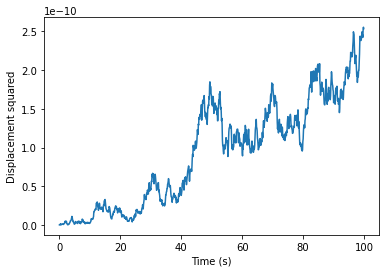

4.2901806459851315e-13 4.3242290867445093e-13


In [126]:
p = Particle(time_steps = 1000)
p.plot_dsquared()
print(p.D, p.calculate_D())

### Compute the displacement squared

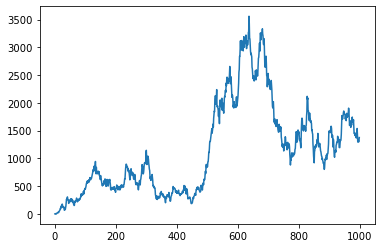

In [70]:
dsquared = p.x**2 + p.y**2
plt.plot(dsquared)
plt.show()

### Theoretical value of 1D

In [71]:
p.D

4.2901806459851315e-13

### Many particles

In [171]:
# Parameters
n_particles = 10
steps = 5000
tau = 0.1 # seconds
particle_size = 1e-6 # in microns
eta = 1e-3 # viscosity of water in SI unit (Pascal-seconds)
kB = 1.38e-23 # Boltzmann constant
T = 293 # in Kelvin
D = kB * T / (3 * np.pi * eta * particle_size)
k = np.sqrt(2 * D * tau)

# Generate trajectory
x = k * np.cumsum(np.random.randn(n_particles, steps), axis=1) 
y = k * np.cumsum(np.random.randn(n_particles, steps), axis=1)


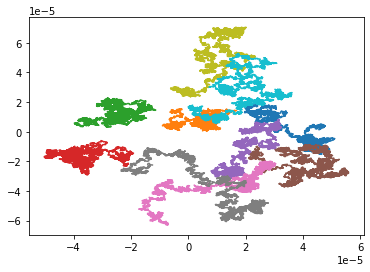

In [172]:
window = [-3e-5, 3e-5]


for x_pos, y_pos in zip(x, y):

    x_pos += np.random.uniform(low=window[0], high = window[1])
    y_pos += np.random.uniform(low=window[0], high = window[1])
    plt.plot(x_pos, y_pos)
plt.show()

In [155]:
np.random.uniform(low=-2e-5, high = 2e-5)


-1.69897659850234e-05